In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
df.shape

(4177, 9)

In [10]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no null value present in the dataset

In [7]:
#Statisticial Summary
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


key obseravtions:
1. the mean is more than median(50th percentile) in shucked weight, viscera weight and shell weight
2.  there is large difference in 75% percentile and max in all the columns

In [10]:
#Exploring data variable
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

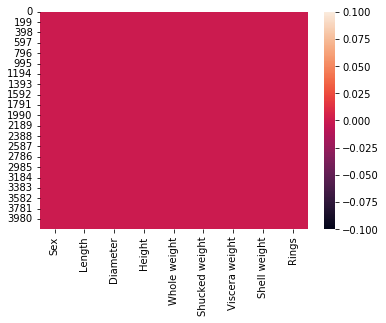

In [11]:
#Data visualization
#checking missing values
sns.heatmap(df.isnull())

In [11]:
dfcor=df.corr()    #checking correlation
dfcor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


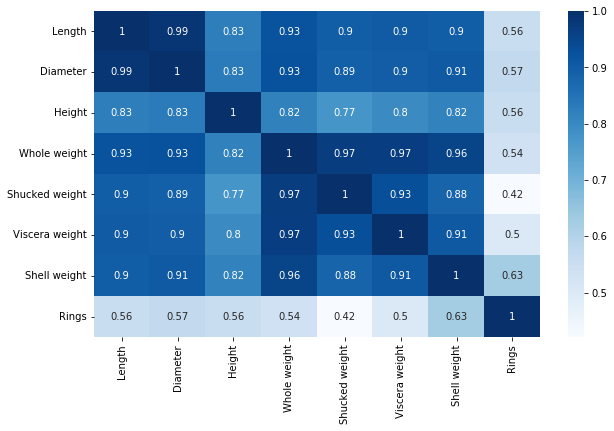

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap="Blues",annot=True)

rings column are highly correlated with shell weight.
all values are positively correlated

finding oultiers

Length               AxesSubplot(0.125,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Viscera weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Shell weight            AxesSubplot(0.125,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.257857,0.125;0.110714x0.343182)
dtype: object

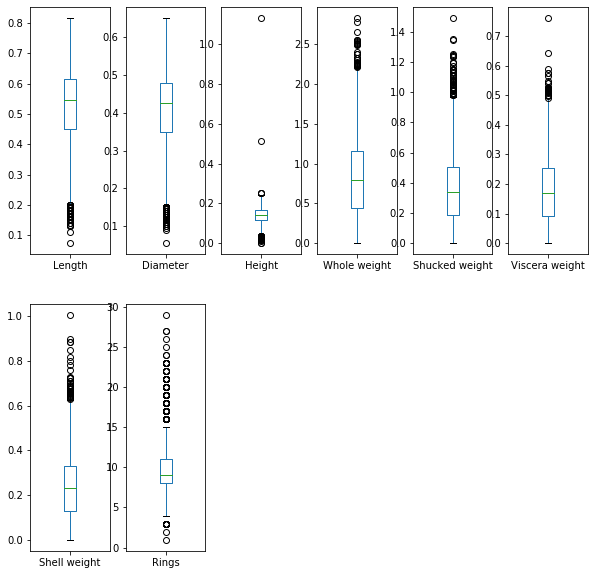

In [13]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

outliers are present in all the columns

In [14]:
#checking skewness
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

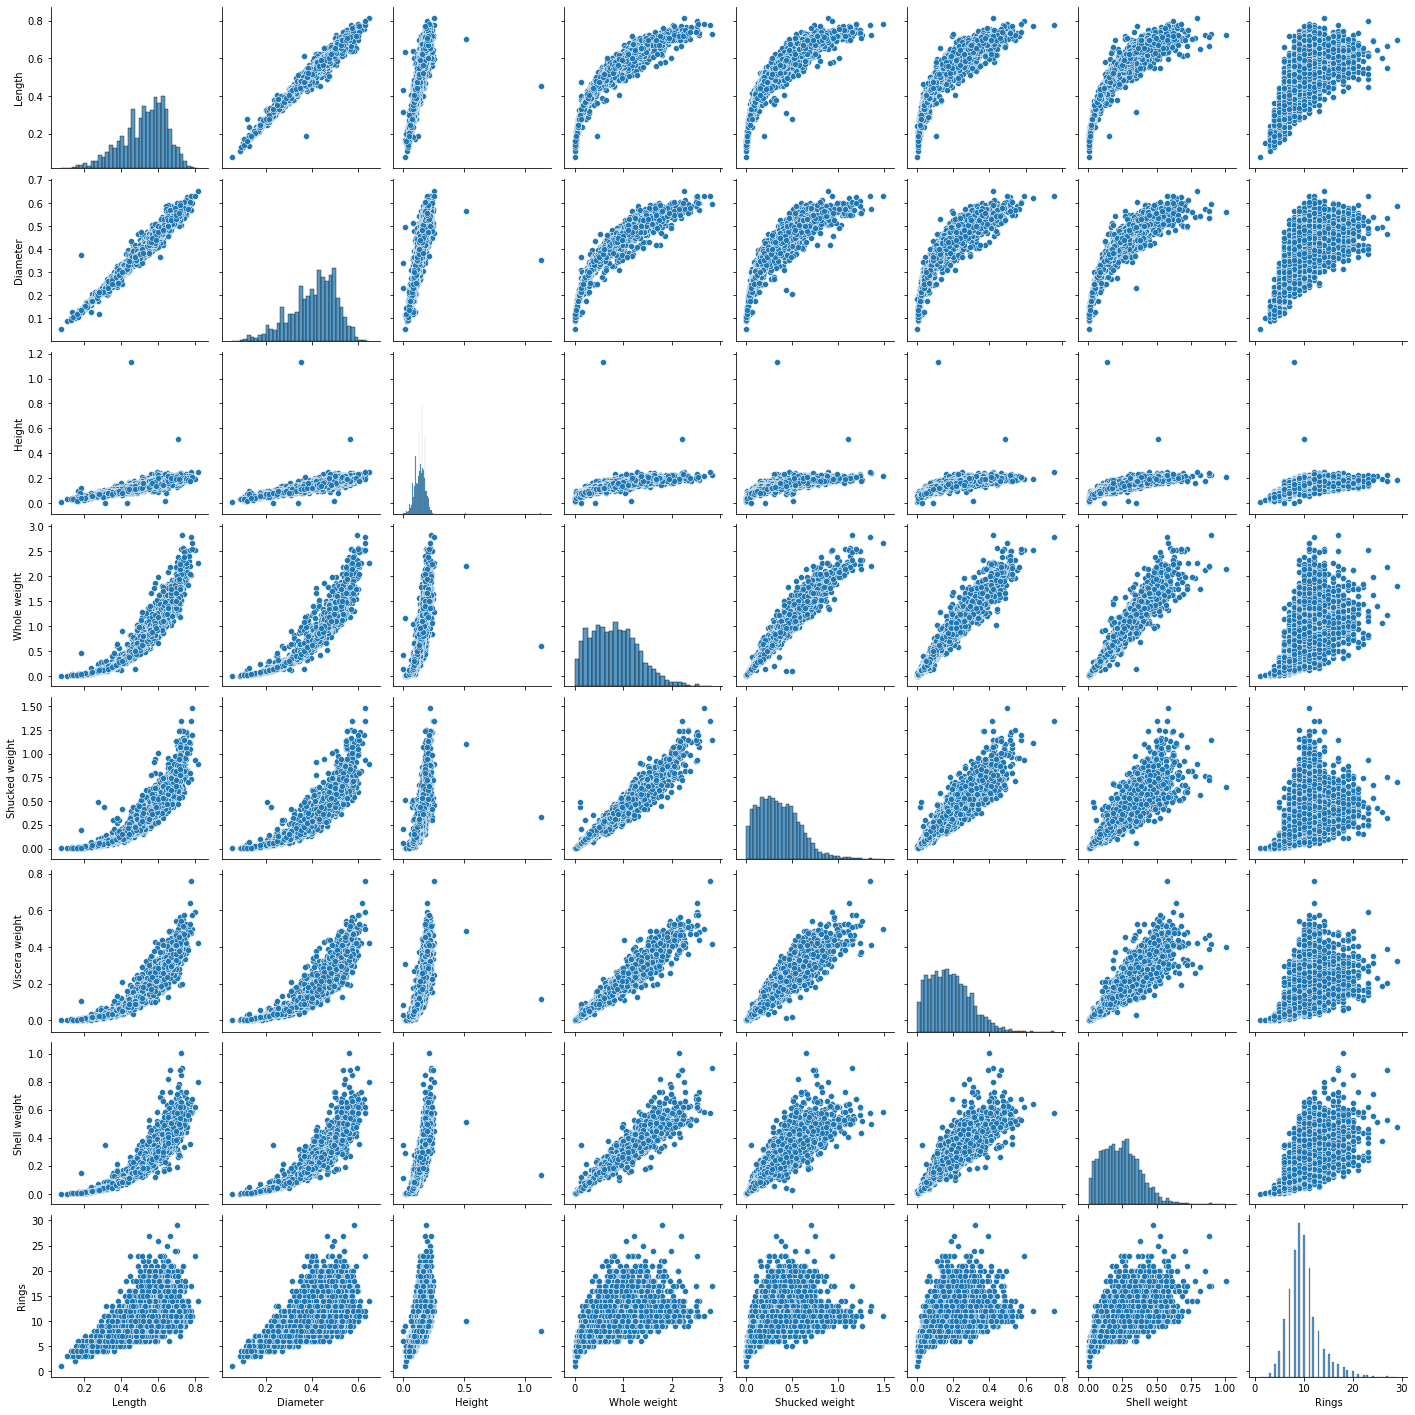

In [15]:
sns.pairplot(df)

Data is not normally distributed and skewness is also present in all the columns

In [16]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,1:]))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [17]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [18]:
dfnew=df[(z<3).all(axis=1)]
dfnew

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


150 rows droppped

In [20]:
#making dataframe for nominal data
df_visual_nominal=dfnew[['Sex']].copy()

In [21]:
df_visual_nominal.columns

Index(['Sex'], dtype='object')

M    1456
I    1322
F    1249
Name: Sex, dtype: int64


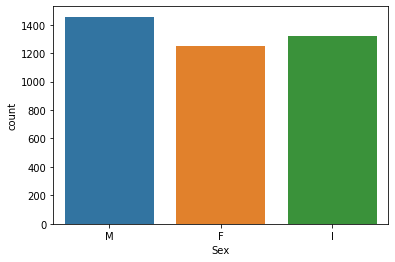

In [23]:
a=sns.countplot(x='Sex',data=df_visual_nominal)
print(df_visual_nominal['Sex'].value_counts())

In [24]:
#encoding of dataframe
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [27]:
for i in dfnew.columns:
    if dfnew[i].dtypes=='object':
        dfnew[i]=enc.fit_transform(dfnew[i].values.reshape(-1,1))

In [28]:
dfnew

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [106]:
#separating data
features=dfnew.iloc[:,0:-1]
target=dfnew.iloc[:,-1]

In [107]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [108]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

# Linear Regression

In [145]:
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
lr=LinearRegression()

In [146]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=1)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the training accuracy is:- {r2_score(target_test,pred_test)}")
          
    print("\n") 

At random state 0,the training accuracy is:- 0.5178458978075204
At random state 0,the training accuracy is:- 0.4941036312407545


At random state 1,the training accuracy is:- 0.5178458978075204
At random state 1,the training accuracy is:- 0.4941036312407545


At random state 2,the training accuracy is:- 0.5178458978075204
At random state 2,the training accuracy is:- 0.4941036312407545


At random state 3,the training accuracy is:- 0.5178458978075204
At random state 3,the training accuracy is:- 0.4941036312407545


At random state 4,the training accuracy is:- 0.5178458978075204
At random state 4,the training accuracy is:- 0.4941036312407545


At random state 5,the training accuracy is:- 0.5178458978075204
At random state 5,the training accuracy is:- 0.4941036312407545


At random state 6,the training accuracy is:- 0.5178458978075204
At random state 6,the training accuracy is:- 0.4941036312407545


At random state 7,the training accuracy is:- 0.5178458978075204
At random state 7,the trai

In [157]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=.33,random_state=42)

In [158]:
lr.fit(features_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
lr.coef_

array([  0.0654267 ,  -2.45376576,  12.22406824,  23.34174767,
         6.81456692, -17.37234472,  -6.70635055,   8.12803303])

In [160]:
lr.intercept_

2.621831250837422

In [161]:
lr.score(x_train,y_train)

0.5159645062909544

In [162]:
pred_test=lr.predict(features_test)

In [163]:
print(r2_score(target_test,pred_test))

0.5062426938685465


In [164]:
print("mean absolute error",mean_absolute_error(target_test,pred))
print("mean squared error",mean_squared_error(target_test,pred))
print("root mean squared error",np.sqrt(mean_squared_error(target_test,pred)))

mean absolute error 1.4849596894835535
mean squared error 4.06303293277026
root mean squared error 2.0156966370885923


In [165]:
from sklearn.metrics import r2_score
print(r2_score(target_test,pred))

0.5062426938685465


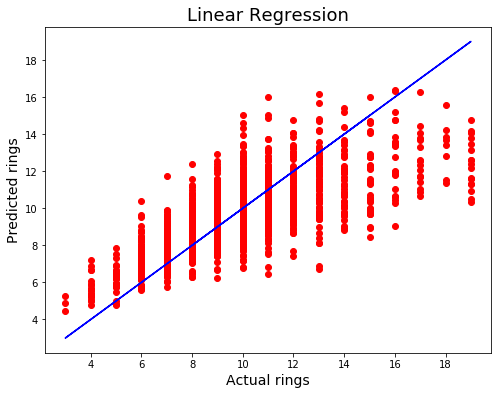

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual rings',fontsize=14)
plt.ylabel('Predicted rings',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [169]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [170]:
#final model training
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

51.59428726767739

In [171]:
pred_ls=ls.predict(features_test)

In [172]:
lss=r2_score(target_test,pred_ls)
lss*100

50.62551606732121

In [173]:
cv_score=cross_val_score(ls,features,target,cv=2)
cv_mean=cv_score.mean()
cv_mean*100

50.917429467023965

# Ensemble technique

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [175]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(features_train,target_train)
train_r2=rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
print('Training r2',train_r2)
rfs=r2_score(target_test,pred_decision)
print("R2Score:",rfs*100)

Training r2 0.9309839676130106
R2Score: 52.78262030315148


we are getting model accuracy as 52.78%

In [176]:
import pickle
filename='abalone.pkl'
pickle.dump(rf,open(filename,'wb'))

# conclusion:

In [177]:
loaded_model=pickle.load(open('abalone.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result*100)

52.78262030315148


In [178]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion.transpose()

,predicted,original
0,8.39,8.39
1,10.54,10.54
2,12.93,12.93
3,13.08,13.08
4,5.24,5.24
...,...,...
1324,9.30,9.30
1325,11.64,11.64
1326,10.18,10.18
1327,13.11,13.11
